# Group 29 Project Proposal: An Investigation on Distinguishing the Presence or Absence of Heart Disease

## Introduction

According to the Centers for Disease Control and Prevention, heart disease is any condition that affects the structure or function of the heart, often caused by high blood pressure, high cholesterol, or smoking. In the USA, heart disease-related complications are the leading cause of death - around 659,000 deaths each year.

To investigate the main factors behind heart disease, I posit the question: "<b>Given values for the age, resting_blood_pressure, cholesterol, ST_depression, and max_heart_rate predictors, what would be the heart disease diagnosis?</b>" using a <i>KNN classification</i> on the <i>Processed Cleveland Heart Disease Dataset</i>. This dataset contains 14 variables and 303 observations.

## Preliminary Exploratory Data Analysis

### Dataset Information

| Variable | Brief Explanation |
| --- | --- |
| Age | a patient's age |
| Sex | a patient's sex (1 = male, 0 = female) |
| Chest Pain Type | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |
| Resting Blood Pressure | in mm Hg on admission to the hospital |
| Serum Cholesterol | a patient's cholesterol measurement in mg/dl |
| Fasting Blood Sugar > 120 mg/dl | 1 = true, 0 = false |
| Resting Electrocardiographic Results | 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria |
| Max Heart Rate | a patient's maximum measured heart rate in bpm |
| Exercised Induced Angina | (1 = yes, 0 = no); angina is a type of heart pain |
| ST Depression Value | a measure of a part of an electrocardiogram reading after exercise, relative to rest |
| Peak ST segment Slope | (1 = upsloping, 2 = flat, 3 = downsloping); another measure of the slope of a part of an electrocardiogram reading after exercise |
| Number of Major Vessels (coloured by fluoroscopy) | 0, 1, 2, 3 vessels |
| Thalassemia | (3 = normal, 6 = fixed defect, 7 = reversable defect); this disorder causes red blood cells to carry less oxygen to the heart |
| Heart Disease Diagnosis | 1 = presence, 0 = absence |

In [1]:
library(tidyverse)
library(tidymodels)
# for data reproducibility
set.seed(3)
# suppress global warnings for readability
options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

First, I upload the data file into Jupyter. The data frame is relatively tidy, but I perform some wrangling improvements:
- Adding variable names 
- Converting values > 1 in the diagnosis variable to be 1 (as specified in the dataset's notes)
- Converting the diagnosis variable to become a factor
- Converting the diagnosis values (0, 1) to be "<b>Absence</b>" and "<b>Presence</b>"
- Converting "?" values to NAs
- Removing 8 categorical variables
- Removing 6 observations with NAs

In [2]:
heart_disease <- read_csv("data/processed.cleveland.data",
                          col_names = c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "electrocardio_results", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_peak_slope", "major_vessels", "thal", "diagnosis"))

heart_disease <- heart_disease 

heart_disease <- heart_disease %>%
    mutate(diagnosis = as.factor(ifelse(diagnosis == 0, "Absence", "Presence")))

heart_disease[heart_disease == "?"] <- NA

heart_disease <- na.omit(heart_disease)

heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  cholesterol = col_double(),
  fasting_blood_sugar = col_double(),
  electrocardio_results = col_double(),
  max_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  ST_depression = col_double(),
  ST_peak_slope = col_double(),
  major_vessels = col_character(),
  thal = col_character(),
  diagnosis = col_double()
)



age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardio_results,max_heart_rate,exercise_induced_angina,ST_depression,ST_peak_slope,major_vessels,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Absence
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Presence
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Presence
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Absence
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,Absence
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Absence
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,Presence
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Absence
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,Presence


In [3]:
# split data into training & testing sets
heart_disease_split <- initial_split(heart_disease, prop = 0.8, strata = diagnosis)

heart_disease_train <- training(heart_disease_split)
heart_disease_train <- heart_disease_train %>%
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression, diagnosis)
heart_disease_train

heart_disease_test <- testing(heart_disease_split)

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absence
67,160,286,108,1.5,Presence
67,120,229,129,2.6,Presence
37,130,250,187,3.5,Absence
41,130,204,172,1.4,Absence
56,120,236,178,0.8,Absence
62,140,268,160,3.6,Presence
53,140,203,155,3.1,Presence
57,140,192,148,0.4,Absence


### Number of Observations Per Class

In [4]:
heart_disease_proportions <- heart_disease_train %>%
    group_by(diagnosis) %>%
    summarize(n = n()) %>%
    mutate(percent = 100 * n / nrow(heart_disease_train))

heart_disease_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
Absence,129,53.9749
Presence,110,46.0251


### Mean Predictor Values
- NOTE: see the "Methods" section for my predictor choice reasoning

In [5]:
heart_disease_predictors <- heart_disease_train %>%
    select(-diagnosis) %>%
    map_df(mean)

heart_disease_predictors

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.53556,131.8536,247.159,149.8996,1.040167


### Number of Missing Observations

In [6]:
naCols <- colSums(is.na(heart_disease_train))

print(naCols)

                   age resting_blood_pressure            cholesterol 
                     0                      0                      0 
        max_heart_rate          ST_depression              diagnosis 
                     0                      0                      0 


### Visualizations

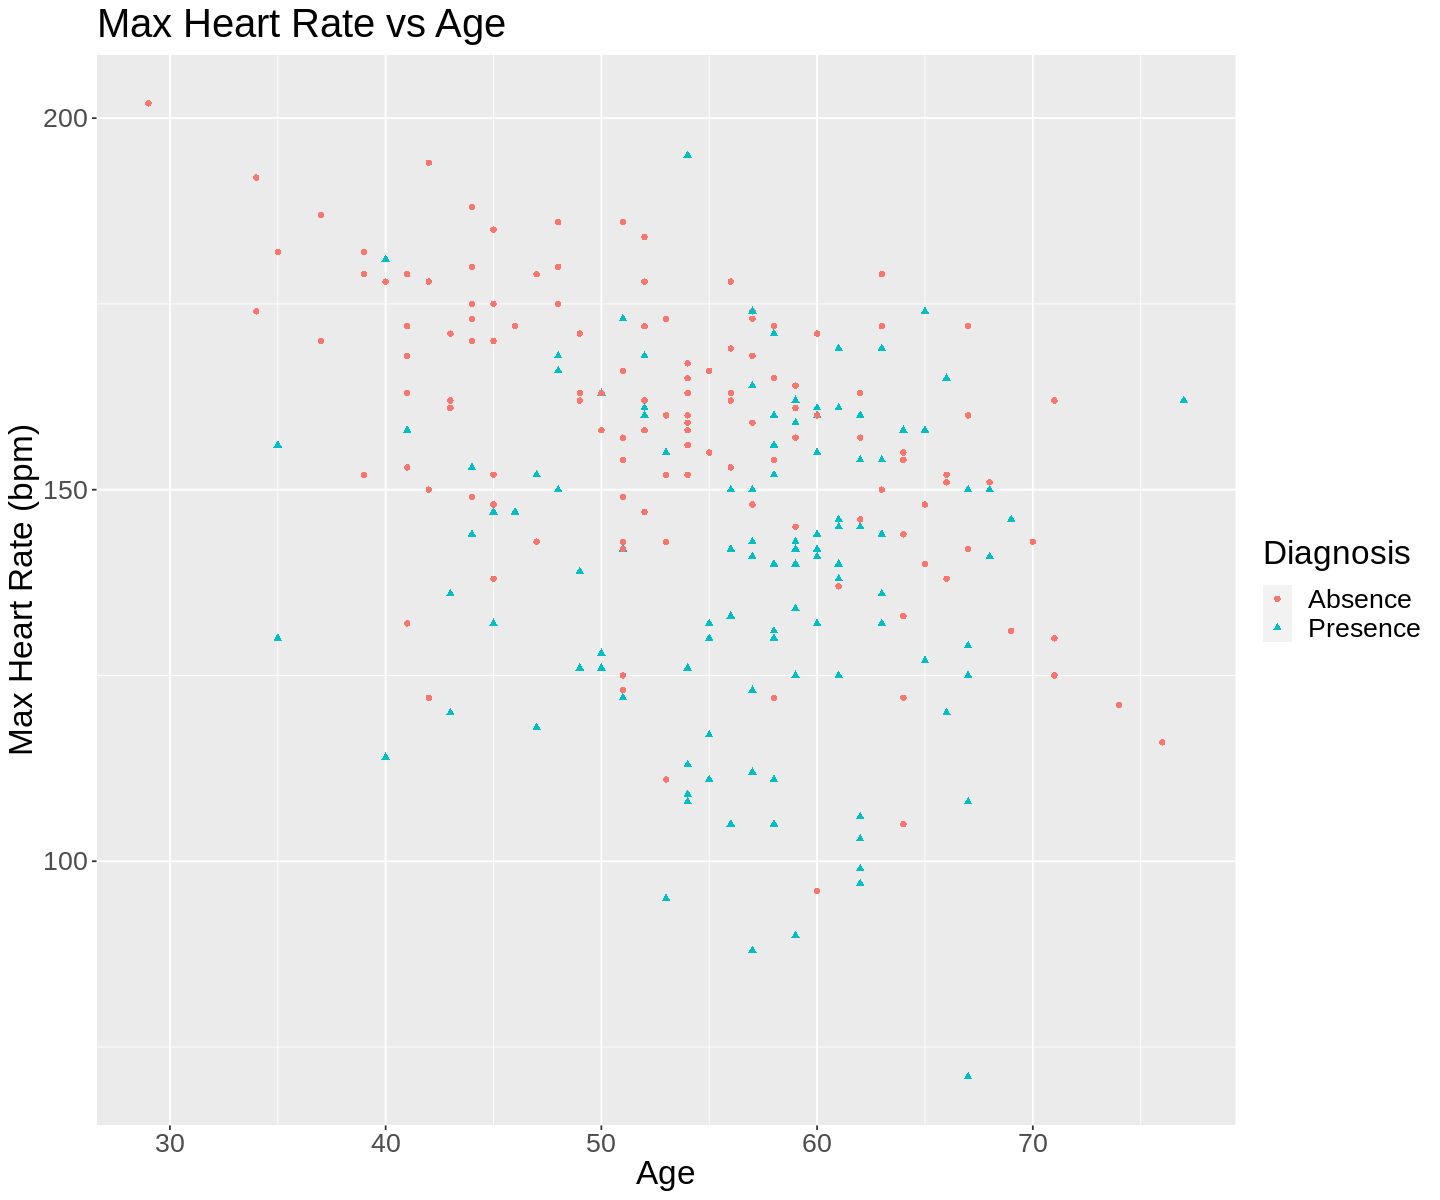

In [13]:
options(repr.plot.width = 12, repr.plot.height = 10)
blood_sugar_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = age, y = max_heart_rate, color = diagnosis, shape = diagnosis)) +
        geom_point() + 
        labs(x = "Age", y = "Max Heart Rate (bpm)", color = "Diagnosis", shape = "Diagnosis") + 
        ggtitle("Max Heart Rate vs Age") +
        theme(text = element_text(size = 20))

blood_sugar_heart_rate_plot

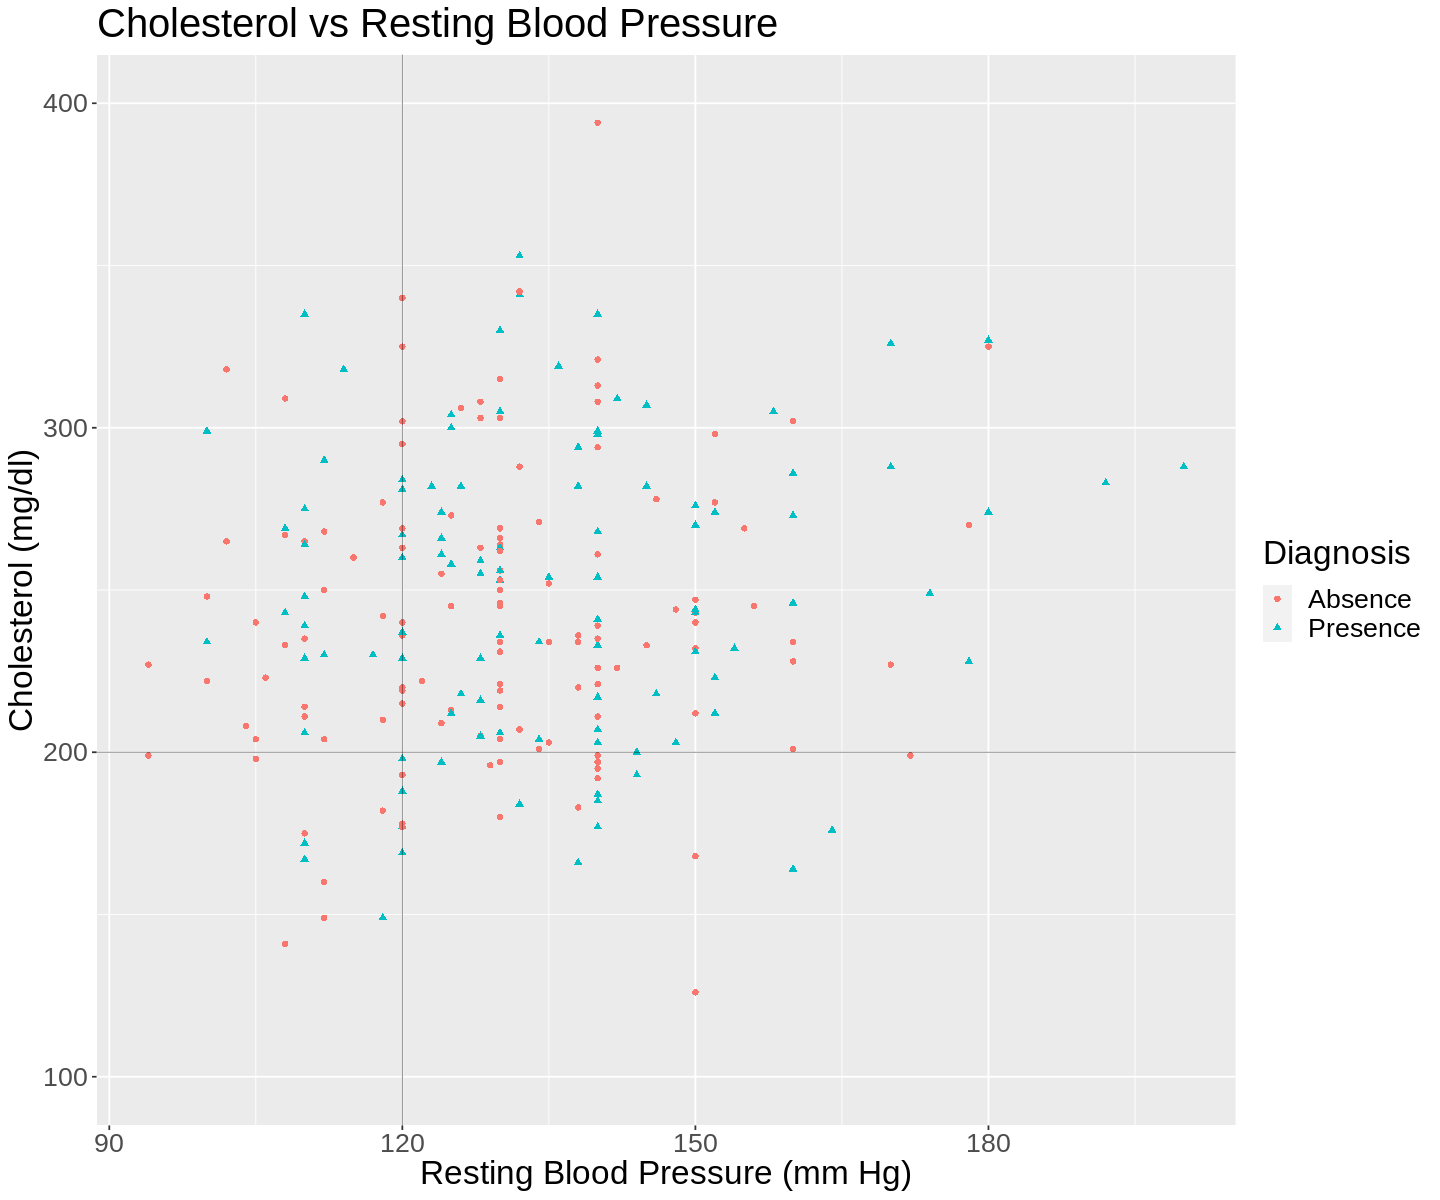

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)

heart_disease_plot <- heart_disease_train %>%
    ggplot(aes(x = resting_blood_pressure, y = cholesterol, color = diagnosis, shape = diagnosis)) +
        geom_point() +
        labs(x = "Resting Blood Pressure (mm Hg)", y = "Cholesterol (mg/dl)", color = "Diagnosis", shape = "Diagnosis") +
        theme(text = element_text(size = 20)) + 
        ggtitle("Cholesterol vs Resting Blood Pressure") +
        geom_hline(yintercept = 200, linetype = "solid", size = 0.25, alpha = 0.5) +
        geom_vline(xintercept = 120, linetype = "solid", size = 0.25, alpha = 0.5) +
        ylim(100, 400) 
# ylim limits y-axis values, excluding some outliers
# vline & hline represent the "healthy" blood pressure and cholesterol levels according to the Centers for Disease Control and Prevention
# (blood pressure < 120 mm Hg, and cholesterol levels < 200 mg/dl)  

heart_disease_plot

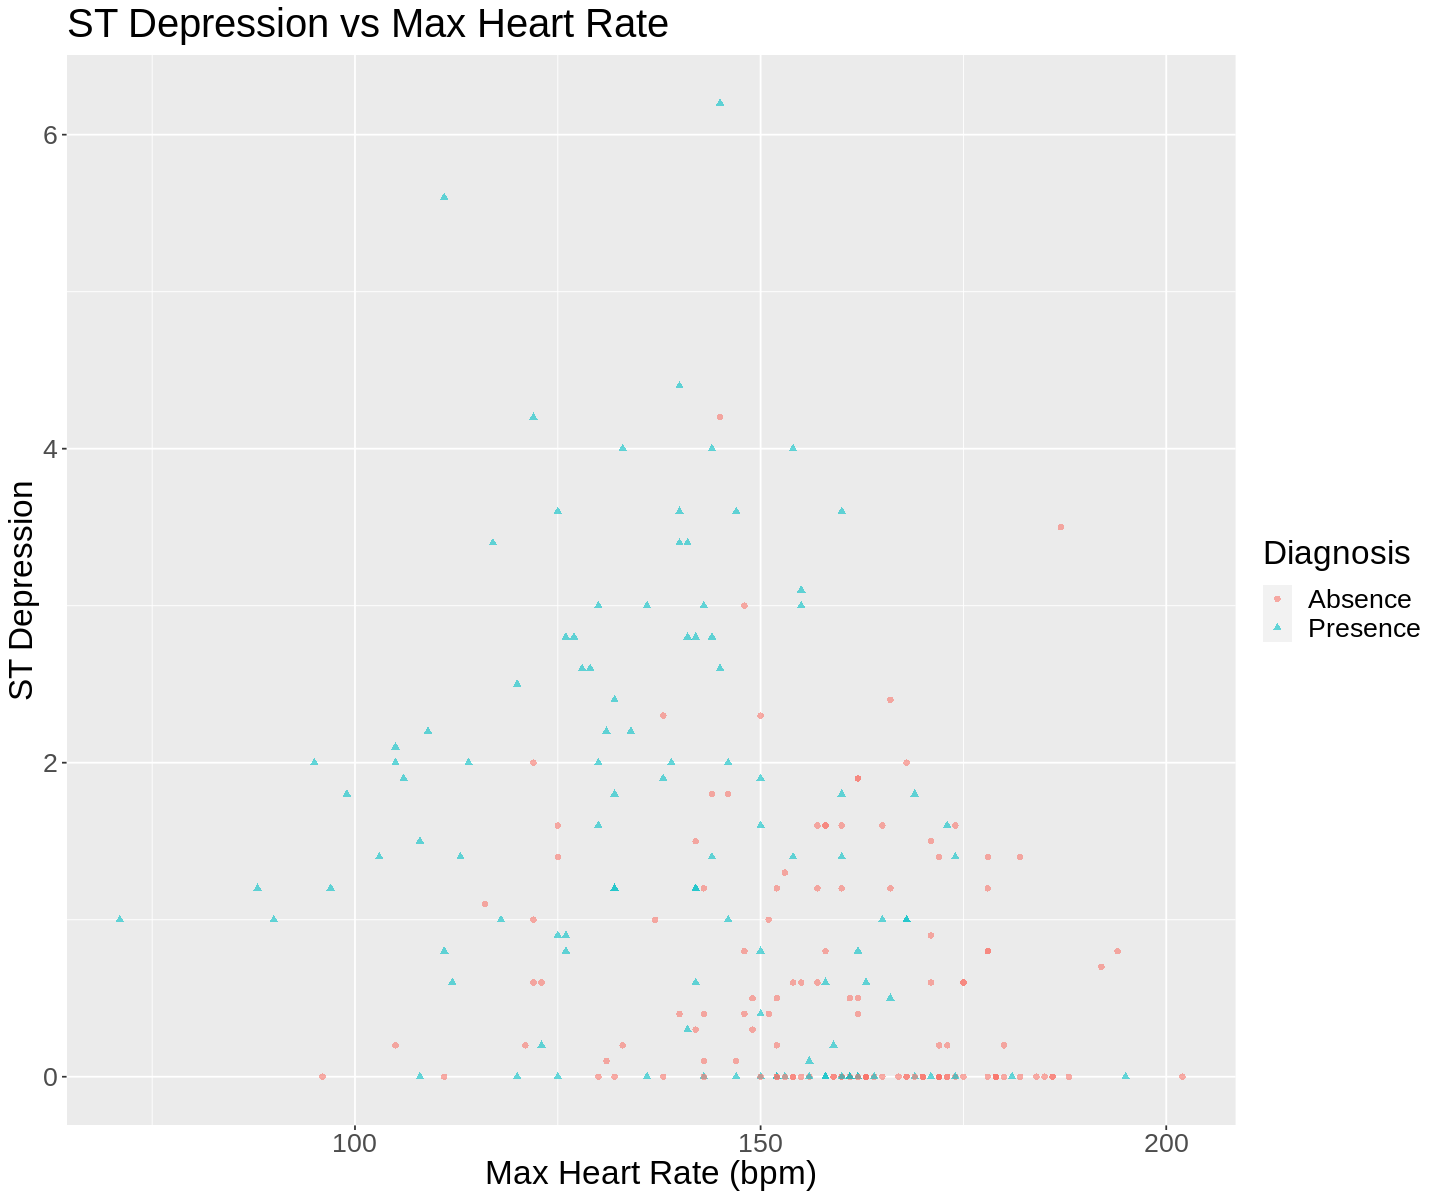

In [15]:
options(repr.plot.width = 12, repr.plot.height = 10)
ST_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = max_heart_rate, y = ST_depression, color = diagnosis, shape = diagnosis)) +
        geom_point(alpha = 0.6) + 
        labs(x = "Max Heart Rate (bpm)", y = "ST Depression",  color = "Diagnosis", shape = "Diagnosis") + 
        ggtitle("ST Depression vs Max Heart Rate") +
        theme(text = element_text(size = 20))

ST_heart_rate_plot

## Methods

Now, I choose my predictors using the forward selection method. From the results, I notice that the accuracy fluctuation between each row is relatively low (1-3%), so I will use <b>age, resting_blood_pressure, cholesterol, ST_depression, and max_heart_rate</b> as my predictors. These five predictors are also all the quantitative predictors in the dataset. With information from the above visualizations and the Centers for Disease Control and Prevention, I use blood pressure and cholesterol as predictors because higher values of these predictors seemingly lead to increased susceptibility to heart disease. Similarly, I use age and maximum heart rate as predictors because older people are supposedly more susceptible to heart disease, and older people tend to have lower maximum heart rates. Lastly, from the above visualization of "ST depression vs Max Heart Rate", it appears that higher ST depression values result in the presence of heart disease, which is an observation I would like to confirm. 

To conduct a KNN classification to determine heart disease diagnoses, my method is as follows:
1. Read, clean, and wrangle the data.
2. Split the data into training and testing sets.
3. Choose a K-value through tuning the model with 5-fold cross-validation.
4. Create a KNN recipe, model specification, and workflow with the chosen K-value. 
5. Fit the model onto the testing data. 
6. Evaluate the estimated accuracy of the classifier using <i>predict()</i>, <i>metrics()</i>, and <i>conf_mat()</i>. 
7. Recreate the above visualizations using the predicted KNN classifications but representing the classification regions as coloured clouds. 

In [10]:
names <- colnames(heart_disease_train %>% select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(heart_disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ ST_depression,0.6823582
2,diagnosis ~ ST_depression+max_heart_rate,0.7114362
3,diagnosis ~ ST_depression+max_heart_rate+age,0.7070922
4,diagnosis ~ ST_depression+max_heart_rate+age+cholesterol,0.7115248
5,diagnosis ~ ST_depression+max_heart_rate+age+cholesterol+resting_blood_pressure,0.6991135


## Expected Outcomes and Significance

With the selected predictors, I expect the KNN classification model to classify a <b>presence</b> of heart disease for observations that share
- old age 
- high resting blood pressure
- high cholesterol
- low maximum heart rate
- high ST Depression value

Conversely, I expect the model to classify an <b>absence</b> of heart disease for observations that share 
- young age 
- low resting blood pressure
- low cholesterol
- high maximum heart rate
- low ST Depression value

Discovering key heart disease indicators can help with early prevention as doctors can more easily detect potential victims and provide immediate treatment. Furthermore, a model that can output an accurate diagnosis with only a couple of measurements could lead to increased efficiency, affordability, and convenience for heart disease detection, which will encourage more people to check their susceptibility. 

Some areas of further exploration include: 
1. Including a column with the patients' smoking habits in the data. 
2. Expanding the data analysis scope beyond Cleveland. 

## Works Cited

"Getting Your Cholesterol Checked." <i>Centers for Disease Control and Prevention</i>, 15 Apr. 2021, www.cdc.gov/cholesterol/cholesterol_screening.htm. Accessed 15 Feb. 2022.

"Heart Disease Facts." <i>Centers for Disease Control and Prevention</i>, 9 Sept. 2020, www.cdc.gov/heartdisease/facts.htm. Accessed 15 Feb. 2022.

"High Blood Pressure Symptoms, Causes, and Problems | Cdc.gov." <i>Centers for Disease Control and Prevention</i>, 18 May 2021, www.cdc.gov/bloodpressure/about.htm. Accessed 15 Feb. 2022.

"Know Your Risk for Heart Disease." <i>Centers for Disease Control and Prevention</i>, 10 Dec. 2019, www.cdc.gov/heartdisease/risk_factors.htm. Accessed 15 Feb. 2022.

"UCI Machine Learning Repository: Heart Disease Data Set." archive.ics.uci.edu/ml/datasets/Heart+Disease. Accessed 12 Feb. 2022.